<h1 style='font-size: 35px; color: DarkBlue;'>Conflito israelo-palestino</h1>
<hr>

In [197]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='darkgrid')
plt.rc('figure', figsize= (14, 6))

In [198]:
dados = pd.read_csv('dados/Palestine_Body_Count.csv')

In [199]:
dados.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36


<h3>Limpeza do Dataset</h3>

<p style= 'font-size: 16px'> &diams; Checando variáveis</p>

In [200]:
dados['Year'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021.,   nan])

In [201]:
dados['Israelis Injuries'].isna().sum()

118

In [202]:
dados['Palestinians Injuries'].isna().sum()

55

In [203]:
print('Valores nan "Palestinians Injuries" = ', dados['Palestinians Injuries'].isna().sum())
print('Valores nan "Palestinians Killed" = ', dados['Palestinians Killed'].isna().sum())
print('Valores nan "Israelis Injuries" = ', dados['Israelis Injuries'].isna().sum())
print('Valores nan "Israelis Killed" = ', dados['Israelis Killed'].isna().sum())

Valores nan "Palestinians Injuries" =  55
Valores nan "Palestinians Killed" =  1
Valores nan "Israelis Injuries" =  118
Valores nan "Israelis Killed" =  1


In [204]:
print('Ano minimo : ',dados['Year'].min())
print('Ano minimo : ',dados['Year'].max())

Ano minimo :  2000.0
Ano minimo :  2021.0


In [205]:
dados['Palestinians Injuries'].fillna(0)

0          781
1         3838
2         5984
3            0
4          304
        ...   
246          0
247          0
248          0
249          0
250    111,475
Name: Palestinians Injuries, Length: 251, dtype: object

<p style= 'font-size: 16px'> &diams; Removendo valores inconsistentes e Strings das variáveis <b><i>Palestinians Injuries</i></b> e <b><i>Israelis Injuries</i></b>, transformando em Float ou NaN</p>

In [206]:
default_value = np.nan

for i, val in enumerate(dados['Palestinians Injuries']):
    try:
        dados.loc[i, 'Palestinians Injuries'] = float(val)
    except:
        dados.loc[i, 'Palestinians Injuries'] = default_value

In [207]:
for i, val in enumerate(dados['Israelis Injuries']):
    try:
        dados.loc[i, 'Israelis Injuries'] = float(val)
    except:
        dados.loc[i, 'Israelis Injuries'] = default_value

<p style= 'font-size: 16px'> &diams; Convertendo os valores com <b>Vírgula</b> para <b>Ponto</b></p>

In [208]:
dados['Israelis Killed'] = dados['Israelis Killed'].str.replace(',', '.')

In [209]:
dados['Palestinians Killed'] = dados['Palestinians Killed'].str.replace(',', '.')

In [210]:
dados['Israelis Injuries'] = dados['Palestinians Killed'].str.replace(',', '.')

<p style= 'font-size: 16px'> &diams; Convertando para <b>Numérico</b></p>

In [211]:
dados['Palestinians Injuries'] = pd.to_numeric(dados['Palestinians Injuries'])

In [212]:
dados['Palestinians Killed'] = pd.to_numeric(dados['Palestinians Killed'])
dados['Israelis Injuries'] = pd.to_numeric(dados['Israelis Injuries'])

In [213]:
dados['Israelis Killed'] = pd.to_numeric(dados['Israelis Killed'])

<p style= 'font-size: 16px'> &diams; Testando as variáveis limpadas</p>

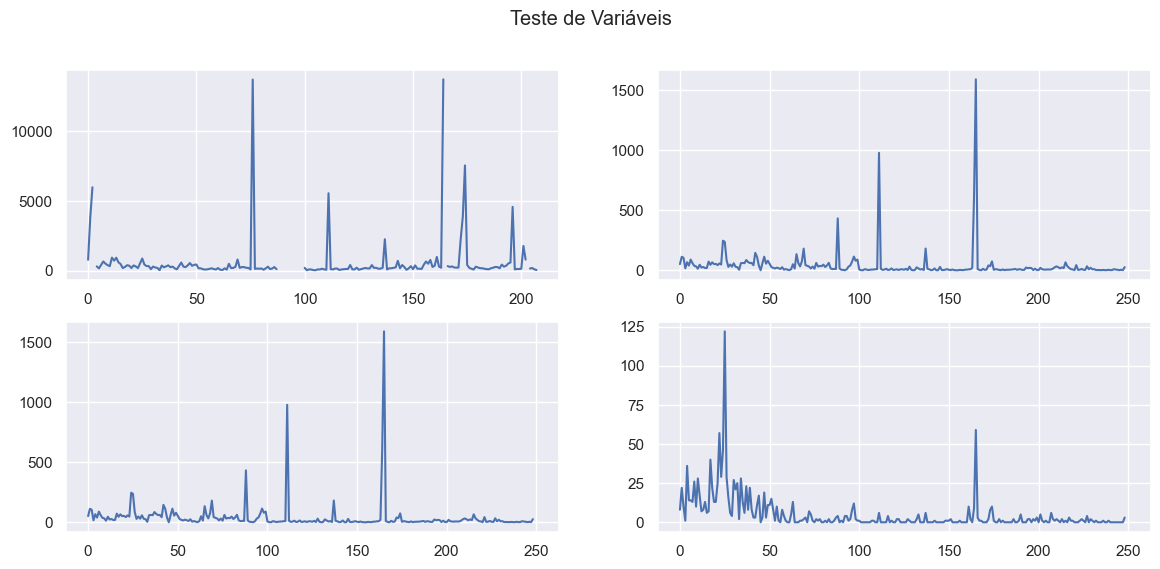

In [214]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
(ax1, ax2), (ax3, ax4) = gs.subplots()
fig.suptitle('Teste de Variáveis')
ax1.plot(dados['Palestinians Injuries'])
ax2.plot(dados['Palestinians Killed'])
ax3.plot(dados['Israelis Injuries'])
ax4.plot(dados['Israelis Killed'])

<h2>Análise Descritiva</h2>

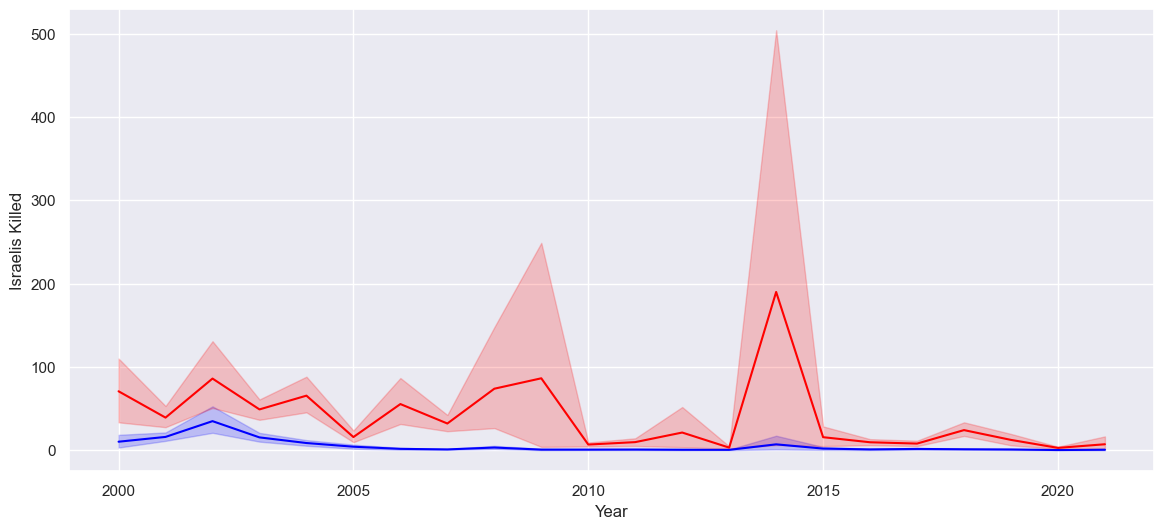

In [275]:
ax = sns.lineplot(dados, x='Year', y='Israelis Killed', color='blue')
ax = sns.lineplot(dados, x='Year', y='Palestinians Killed', color='red')